In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# The MESA stellar evolution model¶
#### Initialise the 4 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
s=ms.star_log(mass=4,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Using old star.logsa file ...
 reading ...100% 



Now we're going to make a Kippenhahn diagram

<IPython.core.display.Javascript object>


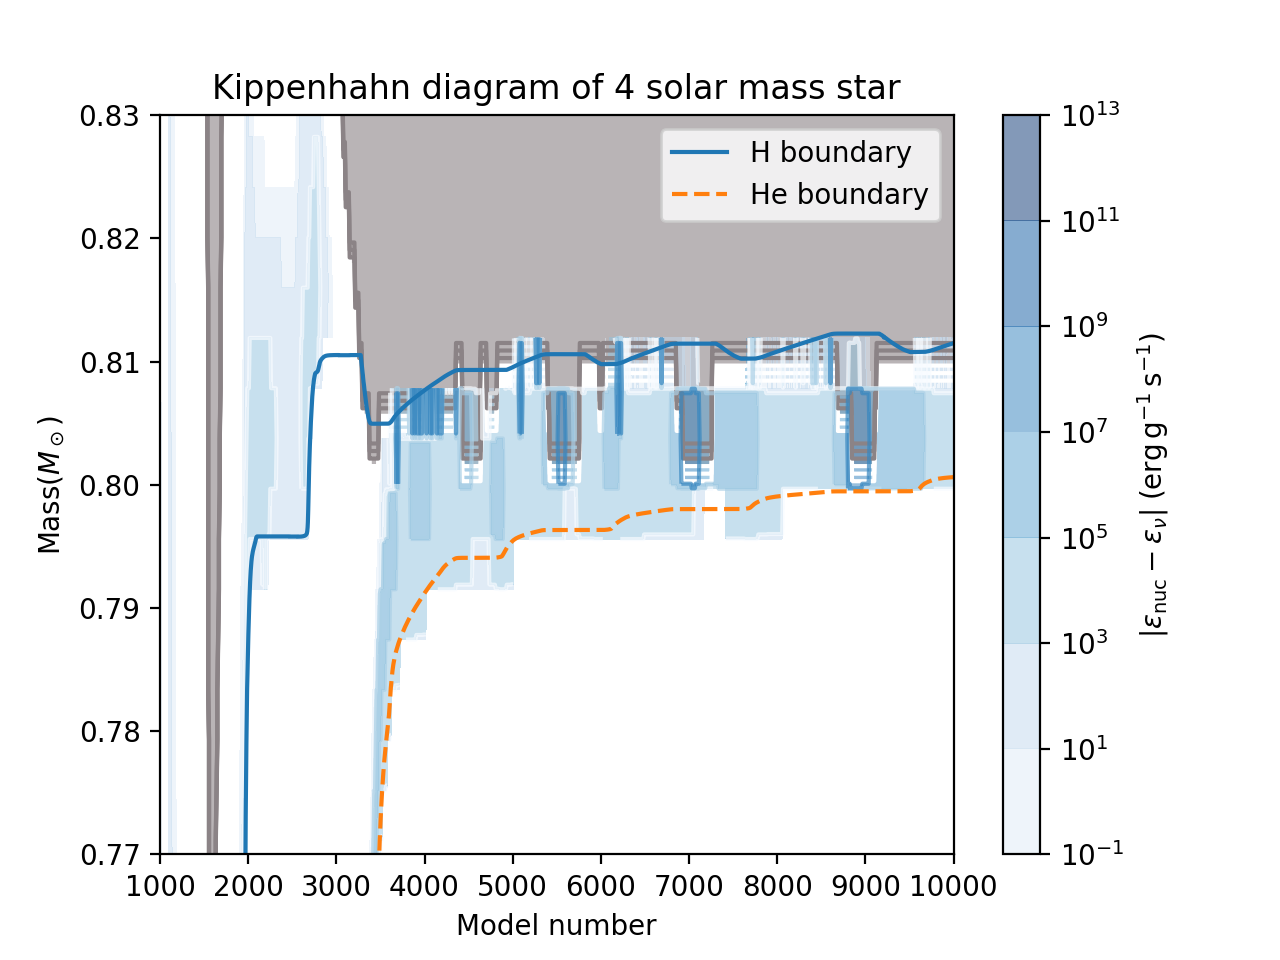

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


(1000, 10000)

In [3]:
ifig=101;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig, xres=10000)
legend()
title('Kippenhahn diagram of 4 solar mass star')
#You can take out the axis limits to see the entire Kippenhahn diagram, but this helps identify the pulses better
ylim(0.77,0.83)
xlim(1000,10000)

#Set xrange and set xres 10000 to get pretty plot
#s.kippenhahn_CO(111,'model') is a faster method (plots boundaries, no shading yay)

If we zoom in (To around 0.78-0.82 solar masses), we can see the thermal pulses (yay!)

Another Way to look at the Kippenhahn diagram is without shading. Here the pulses occur at a C/O ratio of about 0.5, at the h1 and he4 boundary

<IPython.core.display.Javascript object>


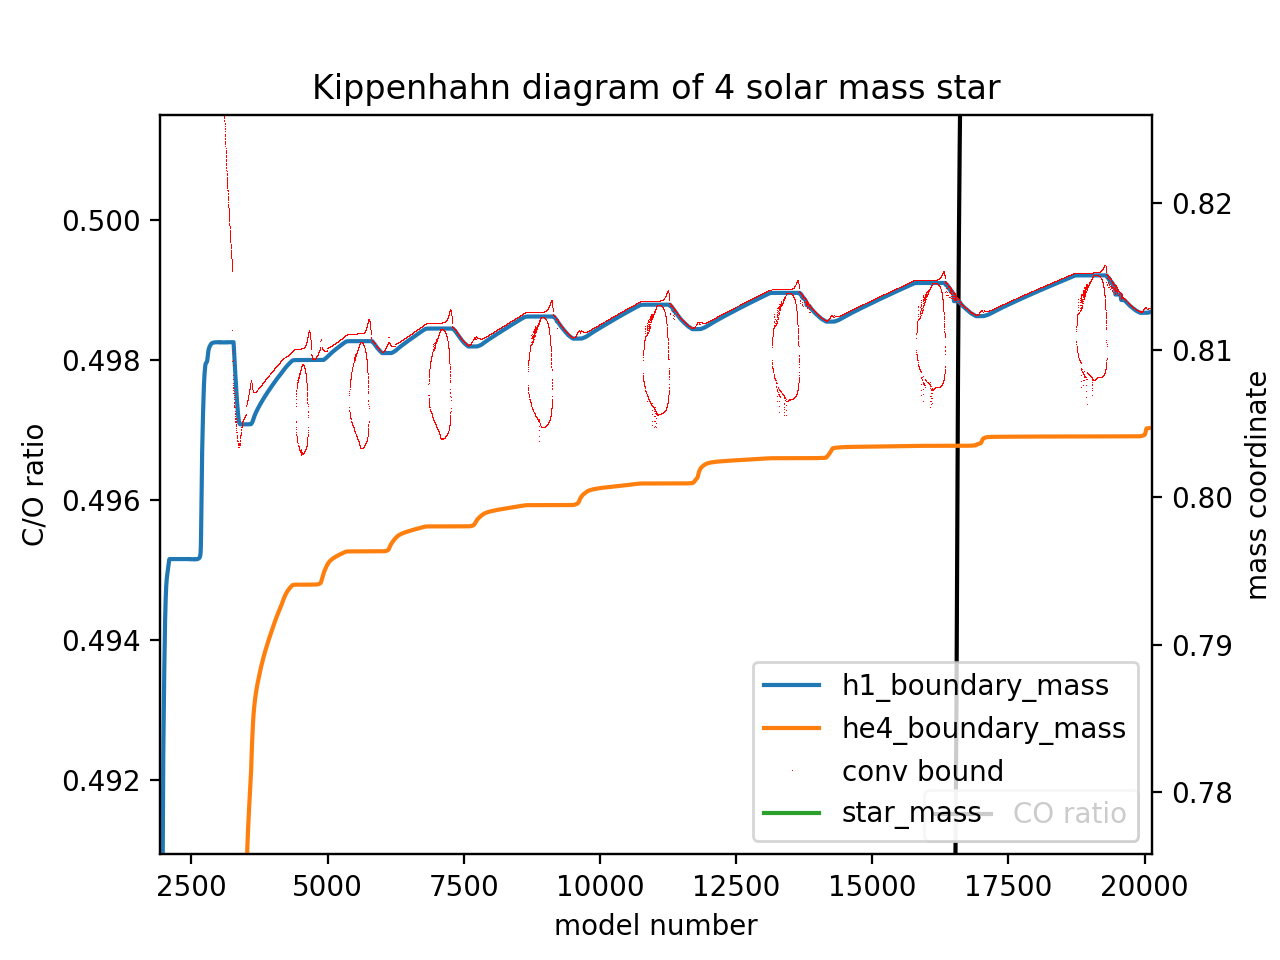

In [19]:
ifig=102;close(ifig);figure(ifig)
s.kippenhahn_CO(102,'model')
legend()
title('Kippenhahn diagram of 4 solar mass star')

The Pulses begin around model number ~4500, with a second pulse ~5500 and a third around ~7100. I am going to look at this third pulse because it has more distinct boundaries, and I am not quite as confident in that first pulse.

Let's assume that the third pulse begins at 5400, is occuring around 5600, and ends around 5800

In [5]:
#Let's download that abundance information
pt=mp.se(mass=4,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 4.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


<IPython.core.display.Javascript object>


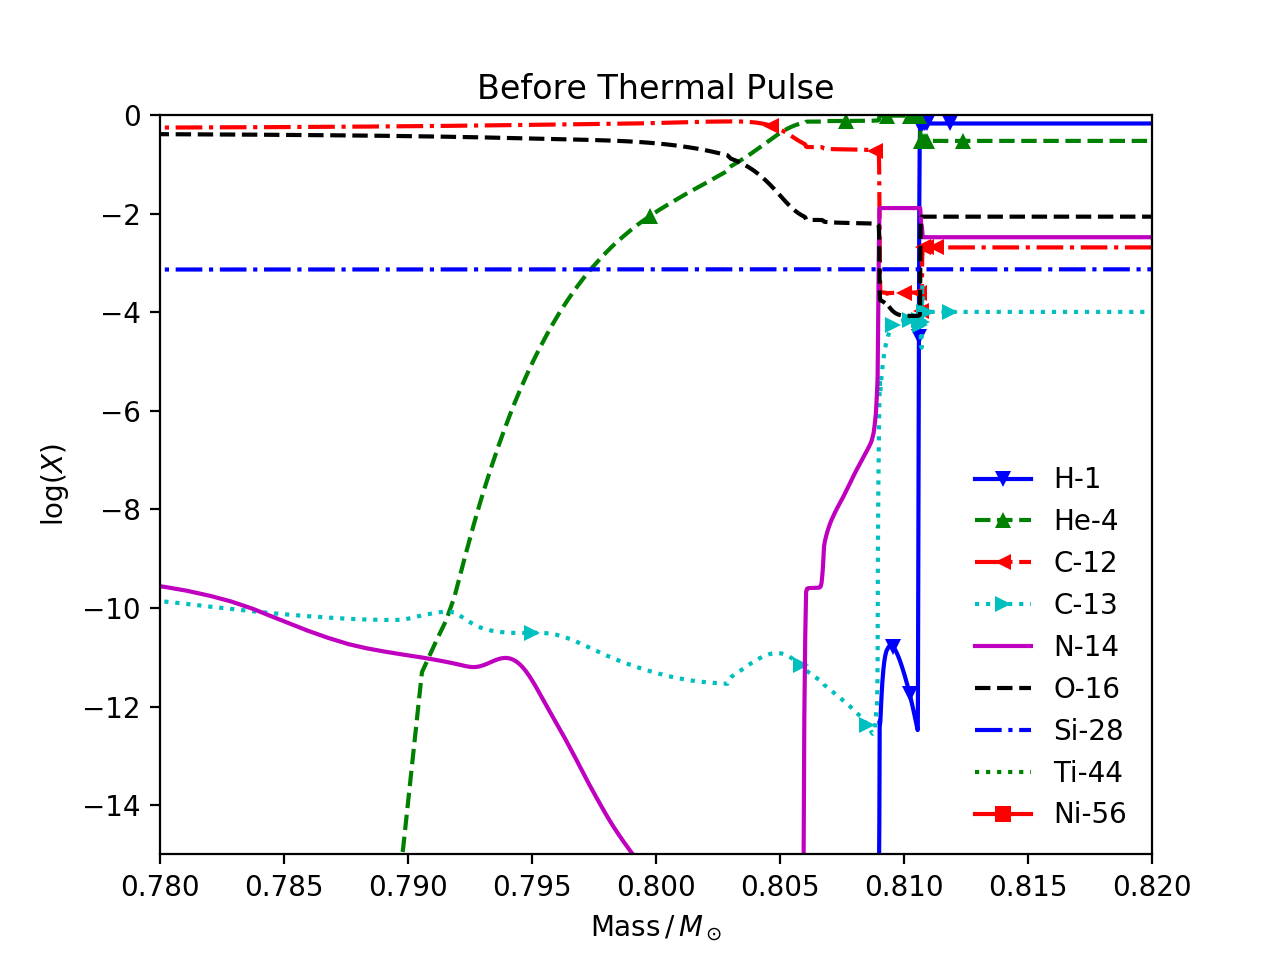

 reading ['iso_massf']...100%

(0.78, 0.82)

In [6]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Si-28','Ti-44','Ni-56']
ifig=103;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=5400, logy=True)
title("Before Thermal Pulse")
ylim(-15,0)
xlim(0.78,0.82)

<IPython.core.display.Javascript object>


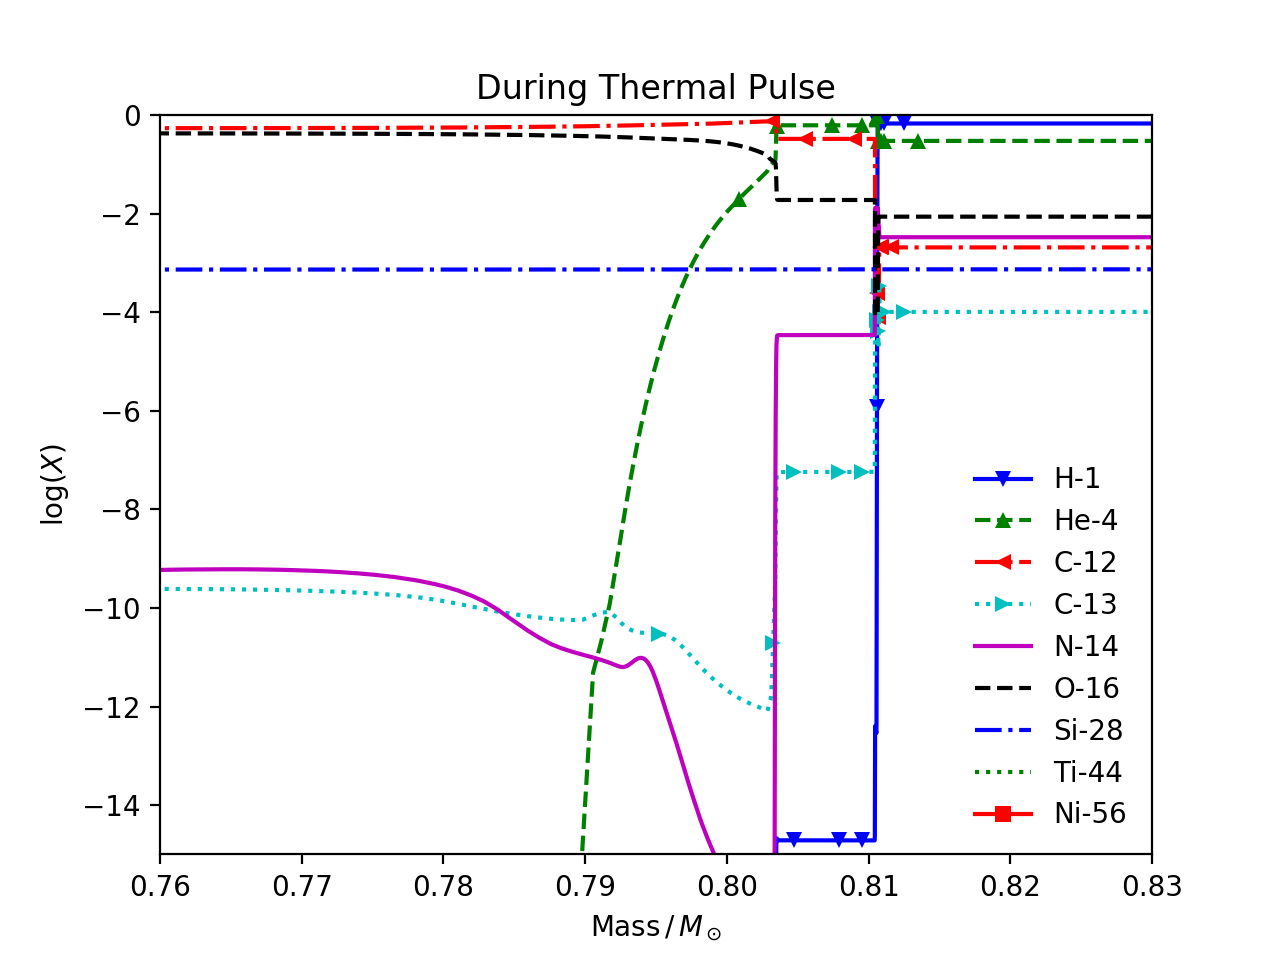

 reading ['iso_massf']...100%

/usr/local/lib/python2.7/dist-packages/nugridpy/data_plot.py:4052: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(abunds[i])


(0.76, 0.83)

In [7]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Si-28','Ti-44','Ni-56']
ifig=104;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=5600, logy=True)
title("During Thermal Pulse")
ylim(-15,0)
xlim(0.76,0.83)

<IPython.core.display.Javascript object>


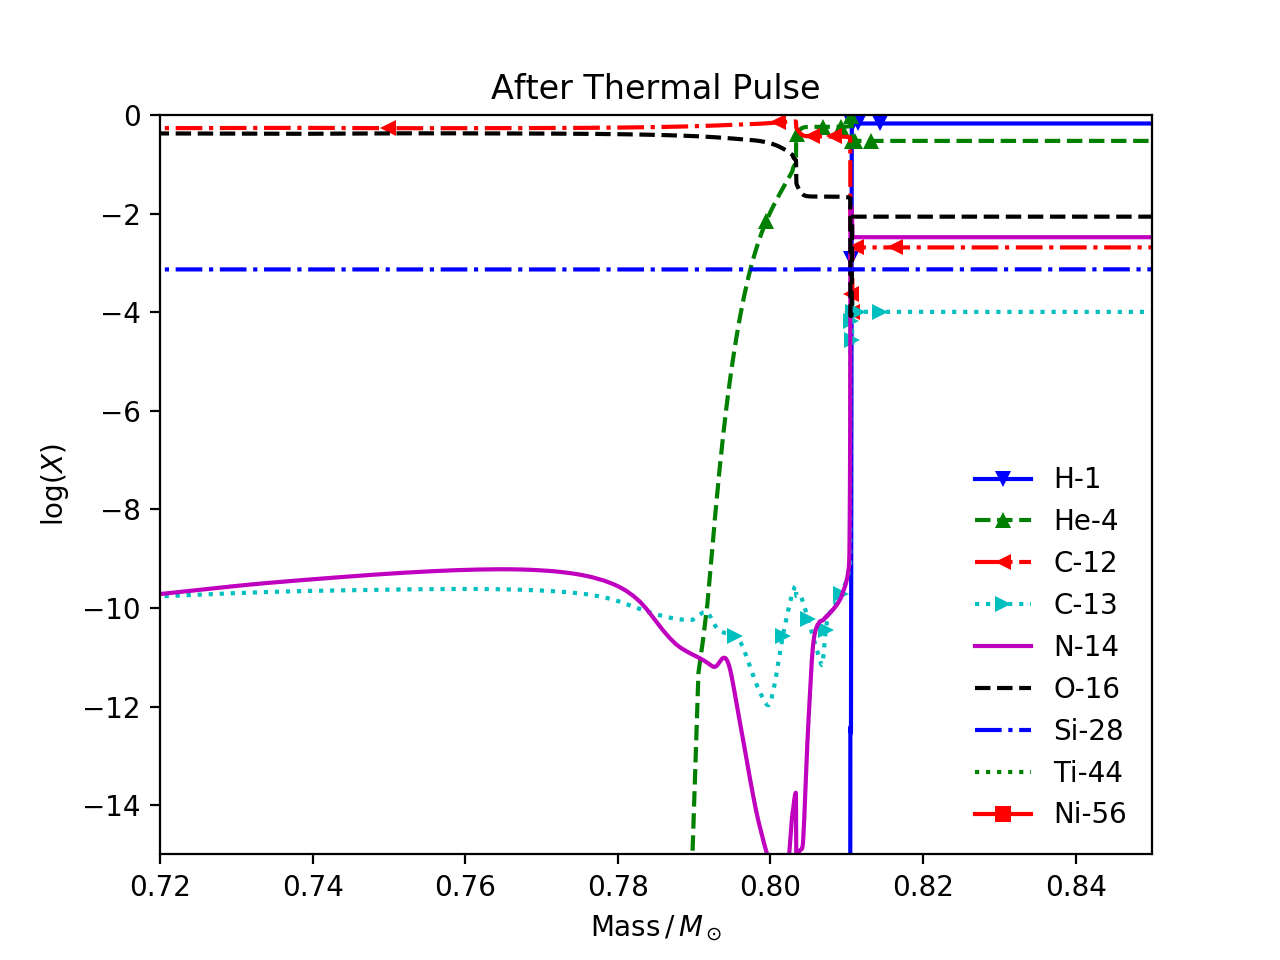

 reading ['iso_massf']...100%

(0.72, 0.85)

In [8]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Si-28','Ti-44','Ni-56']
ifig=105;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=5800, logy=True)
title("After Thermal Pulse")
ylim(-15,0)
xlim(0.72,0.85)

Now we want to look at plots of the Hydrogen Luminosity and Helium Luminosity

In [9]:
#print s.cols

<IPython.core.display.Javascript object>


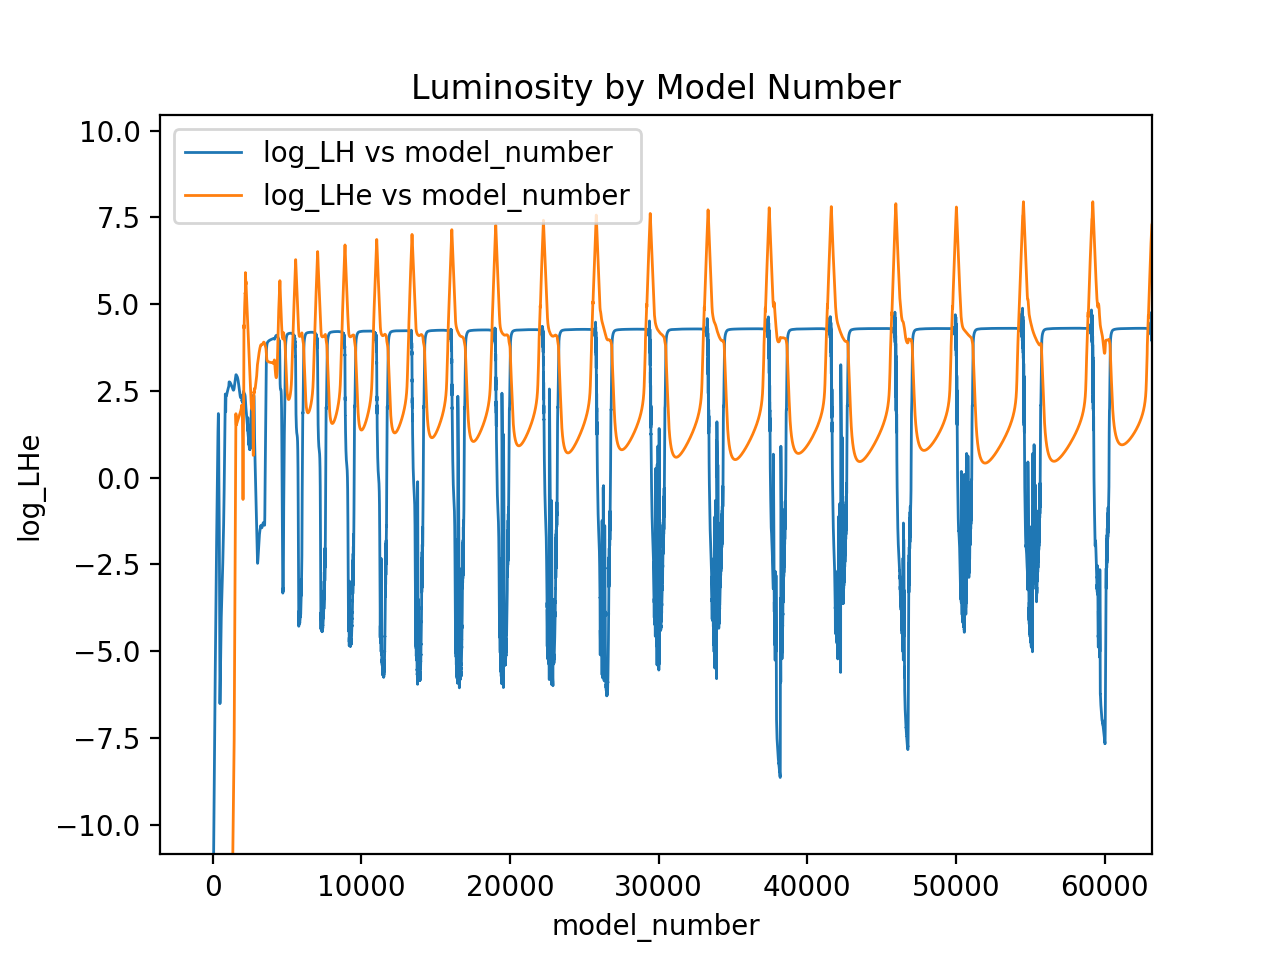

In [20]:
ifig=106;close(ifig);figure(ifig)
s.plot('model_number','log_LH', shape = "-",markevery=1000)
s.plot('model_number','log_LHe', shape="-", markevery=1000)
title('Luminosity by Model Number')

In [ ]:
#You need to set a lower limit on the abundance graph (10^-20 is TOOOOO small)
#Use solar abundances, for example soe lower dectable limit (ask google)
#http://nova.astro.umd.edu/Tlusty2002/solar-abun.html looks like 10^-11 is about a minimum